In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from src.jet.pipelines.model_features import nodes as model_features
from src.jet.pipelines.model_manual import nodes as model_manual
from src.jet.pipelines.model_kmeans import nodes as model_kmeans

### See all dataframe output
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 500)

In [196]:
raw_v3 = pd.read_csv("data/01_raw/REST_SEG_BASE_3.csv")
raw_v4 = pd.read_csv("data/01_raw/REST_SEG_BASE_4.csv")

In [91]:
raw_v4['goo_rating'].notnull().sum()

41589

In [92]:
raw_v4['goo_rating'].isnull().sum()

40480

In [99]:
subset_v4 = raw_v4[raw_v4['goo_rating'].notnull()]
subset_v4.to_csv("data/01_raw/REST_SEG_BASE_4_subset.csv")

In [65]:
raw_v4_edited = raw_v4.copy()
replacement = raw_v3[['restaurant_key','goo_rating']]
replacement = replacement.drop_duplicates()
mapping = dict(replacement.values)
raw_v4_edited['goo_rating'] = raw_v4_edited.restaurant_key.map(mapping)

In [69]:
raw_v4_edited.to_csv("data/01_raw/REST_SEG_BASE_4_edited.csv")

In [66]:
print(f"v3:{len(raw_v3)}, v4:{len(raw_v4)}, v4_edited:{len(raw_v4_edited)}")

v3:80264, v4:82069, v4_edited:82069


In [119]:
raw_v3['ta_rating'].isnull().sum()/len(raw_v3)

0.9943312070168444

In [118]:
raw_v4['ta_rating'].isnull().sum()/len(raw_v4)

1.0

<Axes: xlabel='goo_rating', ylabel='Count'>

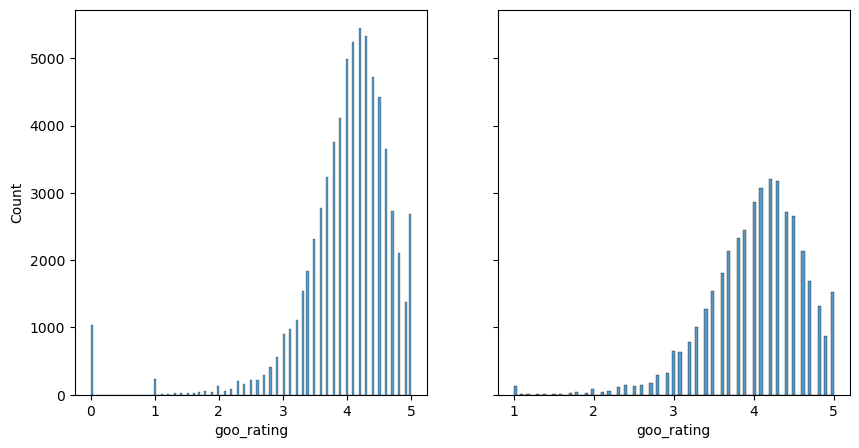

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.histplot(data=raw_v3, x='goo_rating', ax=axes[0])
sns.histplot(data=raw_v4, x='goo_rating', ax=axes[1])

In [6]:
raw_v3['goo_rating'].isnull().sum()/len(raw_v3)

0.13926542410046847

In [7]:
raw_v4['goo_rating'].isnull().sum()/len(raw_v4)

0.49324349023382763

In [8]:
len(raw_v3[raw_v3['goo_rating']==0])/len(raw_v3)

0.01284511113326024

In [9]:
len(raw_v4[raw_v4['goo_rating']==0])/len(raw_v4)

0.0

In [10]:
print(f"v3:{len(raw_v3)}, v4:{len(raw_v4)}")

v3:80264, v4:82069


In [11]:
scorecard_v3 = pd.read_csv("data/03_primary/scorecard_uk_v1_v3.csv")
scorecard_v4 = pd.read_csv("data/03_primary/scorecard_uk_v1_v4.csv")
scorecard_v4_edited = pd.read_csv("data/03_primary/scorecard_uk_v1.csv")

In [12]:
print(f"v3:{len(scorecard_v3)}, v4:{len(scorecard_v4)}, v4_edited:{len(scorecard_v4_edited)}")

v3:50920, v4:48435, v4_edited:50851


In [13]:
score_v3v4 = scorecard_v3.copy()
score_v3v4 = score_v3v4.merge(scorecard_v4_edited, on='restaurant_key', how='outer', suffixes=['v3','v4'])

In [14]:
score_v3v4.sample(5)

,restaurant_key,restaurant_namev3,cuisinev3,restaurant_districtv3,miod__customersv3,avg_main_pricev3,restaurant_miodv3,miod_top_bucket_orders_pcnv3,miod_top_bucket_customers_pcnv3,miod_top_bucket_repeat_ordersv3,total_ratingv3,miod_top_bucket_orders_pcn_scaledv3,miod_top_bucket_customers_pcn_scaledv3,miod_top_bucket_repeat_orders_scaledv3,total_rating_scaledv3,scorev3,score_rankv3,restaurant_namev4,cuisinev4,restaurant_districtv4,miod__customersv4,avg_main_pricev4,restaurant_miodv4,miod_top_bucket_orders_pcnv4,miod_top_bucket_customers_pcnv4,miod_top_bucket_repeat_ordersv4,total_ratingv4,miod_top_bucket_orders_pcn_scaledv4,miod_top_bucket_customers_pcn_scaledv4,miod_top_bucket_repeat_orders_scaledv4,total_rating_scaledv4,scorev4,score_rankv4
41698,JE:UK:133312,Pasha Restaurant,"['Turkish', 'Kebabs']",CV1,1007.0,10.283333,4.0,4.40,4.12,1.95,4.1,0.0440,0.0412,0.031452,0.82,0.936652,5.0,Pasha Restaurant,"['Turkish', 'Kebabs']",CV1,932.0,10.283333,4.0,4.65,4.55,1.77,4.100000,0.0465,0.0455,0.030000,0.820000,0.942000,5.0
24044,JE:UK:168252,Whisk Away,"['Café', 'Breakfast']",IV1,703.0,8.464493,1.0,9.64,8.14,1.97,4.3,0.0964,0.0814,0.031774,0.86,1.069574,7.0,Whisk Away,"['Café', 'Breakfast']",IV1,798.0,8.464493,1.0,9.63,8.01,2.14,4.300000,0.0963,0.0801,0.036271,0.860000,1.072671,7.0
15183,JE:UK:122962,Zizzi - Maidstone,"['Italian', 'Pizza']",ME14,579.0,14.206293,3.0,19.88,22.00,1.55,3.9,0.1988,0.2200,0.025000,0.78,1.223800,8.0,Zizzi - Maidstone,"['Italian', 'Pizza']",ME14,537.0,14.206293,3.0,19.61,21.56,1.54,4.066667,0.1961,0.2156,0.026102,0.813333,1.251135,9.0
44035,JE:UK:163163,Rako Cafe,"['Café', 'Indian']",UB1,34.0,NaN,2.0,0.00,0.00,0.00,4.6,0.0000,0.0000,0.000000,0.92,0.920000,5.0,Rako Cafe,"['Café', 'Indian']",UB1,33.0,NaN,2.0,0.00,0.00,0.00,4.600000,0.0000,0.0000,0.000000,0.920000,0.920000,5.0
51166,JE:UK:177120,Greggs - Whitechapel Road,"['Sandwiches', 'Breakfast']",E1,2244.0,NaN,4.0,1.42,0.92,3.33,4.0,0.0142,0.0092,0.053710,0.80,0.877110,4.0,Greggs - Whitechapel Road,"['Sandwiches', 'Breakfast']",E1,2296.0,NaN,4.0,1.38,0.94,3.27,4.000000,0.0138,0.0094,0.055424,0.800000,0.878624,4.0


In [15]:
score_v3v4['v3v4_change'] = 'error'
score_v3v4.loc[score_v3v4['restaurant_namev3'].isna(),'v3v4_change'] = 'new'
score_v3v4.loc[score_v3v4['restaurant_namev4'].isna(),'v3v4_change'] = 'removed'
score_v3v4.loc[(score_v3v4['restaurant_namev3'].notna())&(score_v3v4['restaurant_namev4'].notna()),'v3v4_change'] = 'both'

In [16]:
score_v3v4['v3v4_change'].value_counts()

both       70082
removed     2534
new           49
Name: v3v4_change, dtype: int64

In [17]:
both = score_v3v4[score_v3v4['v3v4_change']=='both']
both['score_diff'] = both['scorev4']-both['scorev3']
both['score_diff'].describe()

/var/folders/qg/cymh3xj54359hfkwzmfnxxlh0000gn/T/ipykernel_66553/1683460921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both['score_diff'] = both['scorev4']-both['scorev3']


count    70082.000000
mean         0.001656
std          0.131113
min         -2.020000
25%         -0.005312
50%          0.000820
75%          0.012113
max          2.050847
Name: score_diff, dtype: float64

In [18]:
both = both.sort_values(by=['score_diff'],ascending=False)

In [19]:
both.head(10)

,restaurant_key,restaurant_namev3,cuisinev3,restaurant_districtv3,miod__customersv3,avg_main_pricev3,restaurant_miodv3,miod_top_bucket_orders_pcnv3,miod_top_bucket_customers_pcnv3,miod_top_bucket_repeat_ordersv3,total_ratingv3,miod_top_bucket_orders_pcn_scaledv3,miod_top_bucket_customers_pcn_scaledv3,miod_top_bucket_repeat_orders_scaledv3,total_rating_scaledv3,scorev3,score_rankv3,restaurant_namev4,cuisinev4,restaurant_districtv4,miod__customersv4,avg_main_pricev4,restaurant_miodv4,miod_top_bucket_orders_pcnv4,miod_top_bucket_customers_pcnv4,miod_top_bucket_repeat_ordersv4,total_ratingv4,miod_top_bucket_orders_pcn_scaledv4,miod_top_bucket_customers_pcn_scaledv4,miod_top_bucket_repeat_orders_scaledv4,total_rating_scaledv4,scorev4,score_rankv4,v3v4_change,score_diff
39071,JE:UK:177017,JAMZ cafe and bakery,"['Café', 'Lunch']",TW17,NaN,NaN,9.0,0.00,0.00,0.00,4.75,0.0000,0.0000,0.000000,0.95,0.950000,5.0,JAMZ cafe and bakery,"['Café', 'Lunch']",TW17,1.0,NaN,9.0,100.00,100.00,3.00,4.75,1.0000,1.0000,0.050847,0.95,3.000847,10.0,both,2.050847
15114,JE:UK:179508,Wings Metaverse,"['Chicken', 'American']",E1,8.0,NaN,3.0,12.50,12.50,1.00,4.80,0.1250,0.1250,0.016129,0.96,1.226129,8.0,Wings Metaverse,"['Chicken', 'American']",E1,1.0,NaN,3.0,100.00,100.00,1.00,4.80,1.0000,1.0000,0.016949,0.96,2.976949,10.0,both,1.750820
11199,JE:UK:164100,Triple Two Coffee The Crossing,"['Lunch', 'Breakfast']",SN1,4.0,NaN,5.0,20.00,25.00,1.00,4.50,0.2000,0.2500,0.016129,0.90,1.366129,9.0,Triple Two Coffee The Crossing,"['Lunch', 'Breakfast']",SN1,1.0,NaN,5.0,100.00,100.00,1.00,4.50,1.0000,1.0000,0.016949,0.90,2.916949,10.0,both,1.550820
9332,JE:UK:132224,The Jolly Roger Fish Bar,"['Fish & Chips', 'Kebabs']",CW9,322.0,3.943750,10.0,27.95,30.40,1.23,4.20,0.2795,0.3040,0.019839,0.84,1.443339,9.0,The Jolly Roger Fish Bar,"['Fish & Chips', 'Kebabs']",CW9,19.0,3.943750,10.0,100.00,100.00,1.00,4.20,1.0000,1.0000,0.016949,0.84,2.856949,10.0,both,1.413610
5180,JE:UK:177547,Passion For Pie Limited,"['British', 'Pies ']",TQ12,3.0,NaN,3.0,33.33,33.33,1.00,4.90,0.3333,0.3333,0.016129,0.98,1.662729,10.0,Passion For Pie Limited,"['British', 'Pies ']",TQ12,1.0,NaN,3.0,100.00,100.00,1.00,4.90,1.0000,1.0000,0.016949,0.98,2.996949,10.0,both,1.334220
3782,JE:UK:146394,The Engine Shack,"['Breakfast', 'Burgers']",SG7,15.0,NaN,10.0,55.00,40.00,1.83,4.00,0.5500,0.4000,0.029516,0.80,1.779516,10.0,The Engine Shack,"['Breakfast', 'Burgers']",SG7,4.0,NaN,10.0,100.00,100.00,1.00,4.00,1.0000,1.0000,0.016949,0.80,2.816949,10.0,both,1.037433
70779,JE:UK:180553,Sbarro - Newton,"['Pizza', 'American']",WN8,425.0,13.679063,4.0,10.37,11.65,1.47,0.00,0.1037,0.1165,0.023710,0.00,0.243910,1.0,Sbarro - Newton,"['Pizza', 'American']",WN8,366.0,13.679063,4.0,10.55,12.53,1.35,5.00,0.1055,0.1253,0.022881,1.00,1.253681,9.0,both,1.009772
71286,JE:UK:27560,The Foundry Fish Shop,"['Fish & Chips', 'Pizza']",TS29,544.0,4.093704,2.0,0.86,1.97,1.27,0.00,0.0086,0.0197,0.020484,0.00,0.048784,1.0,The Foundry Fish Shop,"['Fish & Chips', 'Pizza']",TS29,558.0,4.093704,2.0,0.90,1.92,1.36,5.00,0.0090,0.0192,0.023051,1.00,1.051251,7.0,both,1.002467
70704,JE:UK:75315,Pizza GoGo - Poole,"['Pizza', 'American']",BH12,1199.0,6.115000,4.0,12.71,13.12,2.25,0.00,0.1271,0.1312,0.036290,0.00,0.294590,1.0,Pizza GoGo - Poole,"['Pizza', 'American']",BH12,1160.0,6.115000,4.0,13.43,13.08,2.46,4.90,0.1343,0.1308,0.041695,0.98,1.286795,9.0,both,0.992205
71296,JE:UK:168587,The Crafty Cockney Pie & Mash,"['Pies ', 'British']",SS8,465.0,NaN,4.0,1.07,1.67,1.12,0.00,0.0107,0.0167,0.018065,0.00,0.045465,1.0,The Crafty Cockney Pie & Mash,"['Pies ', 'British']",SS8,495.0,NaN,4.0,2.04,2.55,1.38,4.70,0.0204,0.0255,0.023390,0.94,1.009290,6.0,both,0.963825


In [20]:
both[['restaurant_key','restaurant_namev3','miod_top_bucket_orders_pcn_scaledv3','miod_top_bucket_orders_pcn_scaledv4','miod_top_bucket_customers_pcn_scaledv3','miod_top_bucket_customers_pcn_scaledv4','miod_top_bucket_repeat_orders_scaledv3','miod_top_bucket_repeat_orders_scaledv4','total_ratingv3','total_ratingv4','scorev3','scorev4','score_diff']].head(20)

,restaurant_key,restaurant_namev3,miod_top_bucket_orders_pcn_scaledv3,miod_top_bucket_orders_pcn_scaledv4,miod_top_bucket_customers_pcn_scaledv3,miod_top_bucket_customers_pcn_scaledv4,miod_top_bucket_repeat_orders_scaledv3,miod_top_bucket_repeat_orders_scaledv4,total_ratingv3,total_ratingv4,scorev3,scorev4,score_diff
39071,JE:UK:177017,JAMZ cafe and bakery,0.0000,1.0000,0.0000,1.0000,0.000000,0.050847,4.75,4.75,0.950000,3.000847,2.050847
15114,JE:UK:179508,Wings Metaverse,0.1250,1.0000,0.1250,1.0000,0.016129,0.016949,4.80,4.80,1.226129,2.976949,1.750820
11199,JE:UK:164100,Triple Two Coffee The Crossing,0.2000,1.0000,0.2500,1.0000,0.016129,0.016949,4.50,4.50,1.366129,2.916949,1.550820
9332,JE:UK:132224,The Jolly Roger Fish Bar,0.2795,1.0000,0.3040,1.0000,0.019839,0.016949,4.20,4.20,1.443339,2.856949,1.413610
5180,JE:UK:177547,Passion For Pie Limited,0.3333,1.0000,0.3333,1.0000,0.016129,0.016949,4.90,4.90,1.662729,2.996949,1.334220
3782,JE:UK:146394,The Engine Shack,0.5500,1.0000,0.4000,1.0000,0.029516,0.016949,4.00,4.00,1.779516,2.816949,1.037433
70779,JE:UK:180553,Sbarro - Newton,0.1037,0.1055,0.1165,0.1253,0.023710,0.022881,0.00,5.00,0.243910,1.253681,1.009772
71286,JE:UK:27560,The Foundry Fish Shop,0.0086,0.0090,0.0197,0.0192,0.020484,0.023051,0.00,5.00,0.048784,1.051251,1.002467
70704,JE:UK:75315,Pizza GoGo - Poole,0.1271,0.1343,0.1312,0.1308,0.036290,0.041695,0.00,4.90,0.294590,1.286795,0.992205
71296,JE:UK:168587,The Crafty Cockney Pie & Mash,0.0107,0.0204,0.0167,0.0255,0.018065,0.023390,0.00,4.70,0.045465,1.009290,0.963825


<Axes: xlabel='scorev4', ylabel='scorev3'>

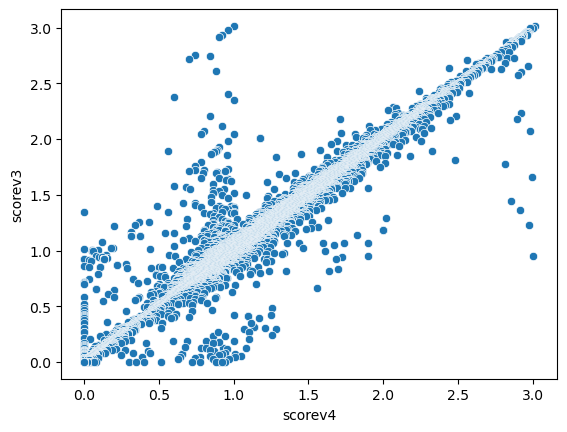

In [21]:
sns.scatterplot(data=score_v3v4, x='scorev4', y='scorev3')

<Axes: xlabel='scorev4', ylabel='Count'>

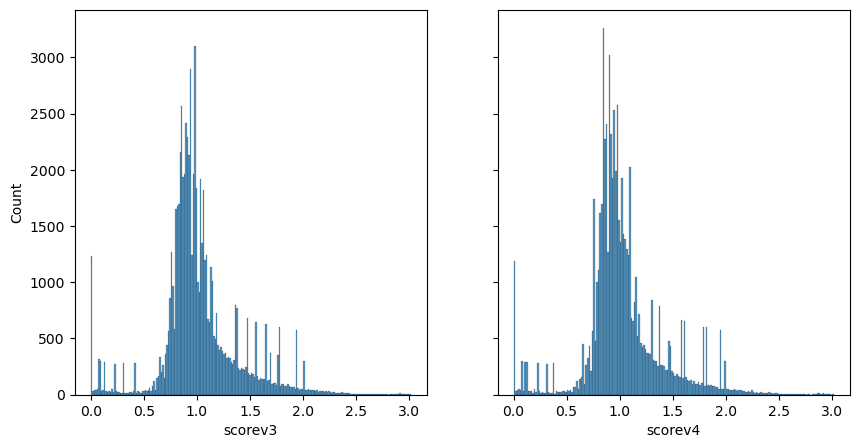

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.histplot(data=score_v3v4, x='scorev3', ax=axes[0])
sns.histplot(data=score_v3v4, x='scorev4', ax=axes[1])

In [23]:
len(both)

70082

In [24]:
len(both[(both['total_ratingv3']!=0)&(both['total_ratingv4']==0)])

945

<Axes: ylabel='scorev4'>

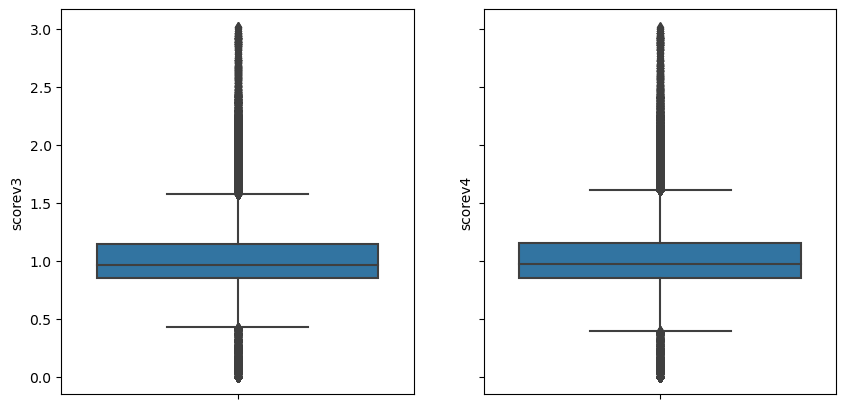

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.boxplot(data=score_v3v4, y='scorev3', ax=axes[0])
sns.boxplot(data=score_v3v4, y='scorev4', ax=axes[1])

In [26]:
score_v3v4[(score_v3v4['scorev4']==0)&(score_v3v4['scorev3']!=0)].sort_values(by=['scorev3']).sample(20)[['restaurant_key','restaurant_namev3','miod_top_bucket_orders_pcn_scaledv3','miod_top_bucket_orders_pcn_scaledv4','miod_top_bucket_customers_pcn_scaledv3','miod_top_bucket_customers_pcn_scaledv4','miod_top_bucket_repeat_orders_scaledv3','miod_top_bucket_repeat_orders_scaledv4','total_ratingv3','total_ratingv4','scorev3','scorev4']]

,restaurant_key,restaurant_namev3,miod_top_bucket_orders_pcn_scaledv3,miod_top_bucket_orders_pcn_scaledv4,miod_top_bucket_customers_pcn_scaledv3,miod_top_bucket_customers_pcn_scaledv4,miod_top_bucket_repeat_orders_scaledv3,miod_top_bucket_repeat_orders_scaledv4,total_ratingv3,total_ratingv4,scorev3,scorev4
29927,JE:UK:173539,M.S.V. Chicken,0.5000,0.0,0.5000,0.0,0.016129,0.0,0.00,0.0,1.016129,0.0
71010,JE:UK:166363,Mac Shack - Nottingham,0.0652,0.0,0.0233,0.0,0.048387,0.0,0.00,0.0,0.136887,0.0
70690,JE:UK:181970,Seoul Finger Licious (Palmers Green),0.1429,0.0,0.1429,0.0,0.016129,0.0,0.00,0.0,0.301929,0.0
71119,JE:UK:181804,Biryani Adda (Brick Lane),0.0370,0.0,0.0417,0.0,0.016129,0.0,0.00,0.0,0.094829,0.0
70551,JE:UK:164873,The Antelope Inn,0.0000,0.0,0.0000,0.0,0.000000,0.0,2.00,0.0,0.400000,0.0
70730,JE:UK:175258,Foggies Food,0.1243,0.0,0.1307,0.0,0.016935,0.0,0.00,0.0,0.271935,0.0
71183,JE:UK:169955,Patty Heaven East,0.0294,0.0,0.0312,0.0,0.016129,0.0,0.00,0.0,0.076729,0.0
71224,JE:UK:179896,Royal Cafe,0.0238,0.0,0.0247,0.0,0.016129,0.0,0.00,0.0,0.064629,0.0
70743,JE:UK:175858,Oozy Burgers,0.1250,0.0,0.1250,0.0,0.016129,0.0,0.00,0.0,0.266129,0.0
43807,JE:UK:172764,Hot Rice & Poke Bowls,0.0000,0.0,0.0000,0.0,0.000000,0.0,4.60,0.0,0.920000,0.0


In [27]:
## jet_reviews, ta_reviews >> total_rating
## google_open_status is missing
## miod customers and orders look fine.
## 

In [198]:
raw_prospects = pd.read_csv("data/09_predict_input/REST_SEG_PROSPECTS_1.csv")
features_prosp = pd.read_csv("data/09_predict_input/prospects_features_data.csv")
prosp_data_full_x = pd.read_csv("data/09_predict_input/prospects_data_full_x.csv")
data_full_x = pd.read_csv("data/05_model_input/data_full_x.csv")

In [284]:
raw_prospects = pd.read_csv("data/04_predict_input/REST_SEG_PROSPECTS_1.csv")
raw_prospects['jet_rating'] = None
raw_prospects['jet_reviews'] = None
raw_prospects.to_csv('data/04_predict_input/REST_SEG_PROSPECTS_1.csv')

In [190]:
raw_prospects.sample(5)

,restaurant_key,restaurant_id_local,restaurant_name,online_date,Delivery_Package__c,FSA_Rating,grocery_flag,cuisine_primary,cuisine_secondary,district_city,restaurant_district,restaurant_postcode,rest_group,chain_flag,restaurant_hva,restaurant_miod,population_density,rural_classification,global_place_id,jet_rating,jet_reviews,goo_active,url,goo_rating,goo_reviews,roo_active,roo_rating,roo_reviews,uber_active,uber_rating,uber_reviews,ta_active,ta_rating,ta_reviews,total_rating,total_reviews,google_location_types,google_open_status,google_primary_cuisine,google_secondary_cuisine,google_cuisine_types,google_dish_types,google_dietary_and_allergy_options,miod_10_orders,miod_9_orders,miod_8_orders,miod_7_orders,miod_6_orders,miod_5_orders,miod_4_orders,miod_3_orders,miod_2_orders,miod_1_orders,miod__orders,miod_10_customers,miod_9_customers,miod_8_customers,miod_7_customers,miod_6_customers,miod_5_customers,miod_4_customers,miod_3_customers,miod_2_customers,miod_1_customers,miod__customers,hva_8_orders,hva_7_orders,hva_6_orders,hva_5_orders,hva_4_orders,hva_3_orders,hva_2_orders,hva_1_orders,hva__orders,hva_8_customers,hva_7_customers,hva_6_customers,hva_5_customers,hva_4_customers,hva_3_customers,hva_2_customers,hva_1_customers,hva__customers
10915,NaN,NaN,Greenberry Café,NaN,NaN,NaN,0,Unknown,"Restaurant, Bar",London,NW1,NW18UR,(Not available),1,2. Wealthy,9.0,99.400000,Urban major conurbation,760753,0,0,1,http://www.greenberrycafe.co.uk/,4.5,929.0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,2.25,929,Restaurant,NaN,NaN,NaN,"Restaurant, Bar",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85771,NaN,NaN,Esher Pizza,NaN,NaN,NaN,0,Pizza,Pizza takeaway,London,KT10,KT108QS,(Not available),1,2. Wealthy,10.0,11.700000,Urban major conurbation,170887,0,0,1,https://esherpizza.com/?utm_source=GMBwebsite&...,4.7,49.0,1,4.1,127.0,1,4.2,26.0,1,NaN,NaN,3.25,202,Restaurant,NaN,NaN,NaN,Pizza takeaway,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174722,NaN,NaN,EveryDay Off Licence,NaN,NaN,NaN,1,Unknown,Convenience store,Leicester,LE3,LE39PW,(Not available),1,3. Younger Urban Spender,1.0,36.200000,Urban city and town,6977221,0,0,1,(Not available),5.0,5.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,5.00,5,Convenience,NaN,NaN,NaN,Convenience store,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34069,NaN,NaN,Ground Espresso Bars,NaN,NaN,NaN,0,Coffee,"Coffee shop, Cafe",Coleraine,BT52,BT521LD,(Not available),1,8. Suburban Low Income,NaN,NaN,NaN,5974791,0,0,1,https://groundcoffee.net/,4.4,249.0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,2.20,249,Cafe,NaN,NaN,NaN,"Coffee shop, Cafe",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
154148,NaN,NaN,Premier hillend road,NaN,NaN,NaN,1,Groceries,Grocery store,Dunfermline,KY11,KY111BF,(Not available),1,6. Younger Suburban Spender,5.0,11.476696,Other Urban Areas,8390493,0,0,1,https://www.premier-stores.co.uk/our-stores/hi...,4.2,63.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,4.20,63,Groceries,NaN,NaN,NaN,Grocery store,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [286]:
def engineer_restaurant_active_on_jet_flag(restaurants_data):
    
    restaurants_data[restaurants_data['restaurant_key'].notnull(),'jet_active']=1
    return restaurants_data

In [307]:
t = predictions[['restaurant_key','jet_active']].sample(5)
t['jet_active'] = 0
t

,restaurant_key,jet_active
49136,NaN,0
181692,NaN,0
226015,JE:UK:167275,0
49525,NaN,0
157678,NaN,0


In [308]:
t.loc[t['restaurant_key'].notnull(),'jet_active'] = 1
t

,restaurant_key,jet_active
49136,NaN,0
181692,NaN,0
226015,JE:UK:167275,1
49525,NaN,0
157678,NaN,0


In [288]:
engineer_restaurant_active_on_jet_flag(t)

TypeError: unhashable type: 'Series'

In [185]:
len(list(features_prosp))

123

In [186]:
t = model_features.split_full_data(features_prosp)
len(list(t))

121

In [187]:
len(list(prosp_data_full_x))

121

In [195]:
predict_cols = list(features_prosp)
input_full_cols = list(data_full_x)
[col for col in input_full_cols if col not in predict_cols]

[]

In [166]:
len(predict_cols)

17

In [167]:
scorecard_v3 = pd.read_csv('data/03_primary/scorecard_uk_v1.csv')
scorecard_v3[['restaurant_key','score']].sample(10)

,restaurant_key,score
29469,JE:UK:80831,0.954826
32666,JE:UK:167726,0.000000
39841,JE:UK:164241,1.015558
12681,JE:UK:6899,0.870684
50891,JE:UK:81658,1.016442
39463,JE:UK:129243,0.990519
43801,JE:UK:93997,0.780000
25716,JE:UK:179455,1.568680
36692,JE:UK:158599,1.045694
6367,JE:UK:76166,0.939035


In [168]:
pred_x_raw = pd.read_csv('data/09_predict_input/REST_SEG_BASE_4_subset.csv')
pred_y = pd.read_csv('data/10_predict_output/model_predicted_xgb.csv')
print(f"raw:{len(pred_x_raw)},targets:{len(pred_y)}")

raw:41589,targets:41589


In [169]:
mapping = dict(scorecard_v3[['restaurant_key','score']].values)


pred_comb = pred_x_raw.copy()
pred_comb = pd.concat([pred_comb,pred_y], axis=1)
pred_qualified = pred_comb[pred_comb['goo_rating'].notnull()]
pred_qualified = pred_qualified[['restaurant_key','score']]
pred_qualified['v3_score'] = pred_qualified['restaurant_key'].map(mapping)
pred_qualified.columns = ('restaurant_key','predicted_score','score')
pred_qualified.sample(5)

,restaurant_key,predicted_score,score
20066,JE:UK:187781,1.078,NaN
9455,JE:UK:120496,1.465,1.496874
39680,JE:UK:106201,0.795,0.805000
26789,JE:UK:9092,0.984,1.142903
17572,JE:UK:197099,1.315,NaN


In [170]:
pred_qualified.isnull().sum()/len(pred_qualified)

restaurant_key     0.000000
predicted_score    0.000000
score              0.357619
dtype: float64

In [171]:
pred_qualified = pred_qualified.dropna()

In [172]:
print(f'qualified:{len(pred_qualified)}, raw:{len(raw_v4)}, qual%:{round(len(pred_qualified)/len(raw_v4),2)}')

qualified:26716, raw:82069, qual%:0.33


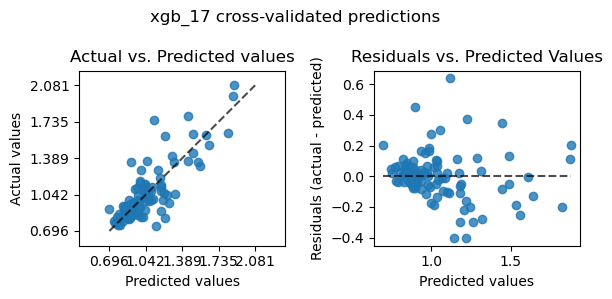

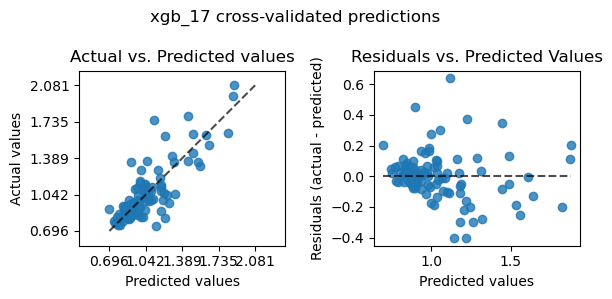

In [173]:
model_manual.visualise_predictions(pred_qualified, pred_qualified, 'xgb_17')

In [174]:
model_manual.evaluate_model(pred_qualified['score'], pred_qualified['predicted_score'])

{'R2': {'value': 0.7477720996745969, 'step': 1},
 'MAE': {'value': 0.10798437233859297, 'step': 1},
 'MSE': {'value': 0.02616952374423303, 'step': 1}}

In [282]:
predictions = pd.read_csv('data/06_predict_output/combined_predictions.csv')
predictions[predictions['jet_active']==1].sample(30)

/var/folders/qg/cymh3xj54359hfkwzmfnxxlh0000gn/T/ipykernel_68840/1198077798.py:1: DtypeWarning: Columns (2,5,6,7,38,39,40,42,43,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  predictions = pd.read_csv('data/06_predict_output/combined_predictions.csv')


,global_place_id,restaurant_name,restaurant_key,restaurant_id_local,jet_active,online_date,Delivery_Package__c,FSA_Rating,grocery_flag,cuisine_primary,cuisine_secondary,district_city,restaurant_district,restaurant_postcode,rest_group,chain_flag,restaurant_hva,restaurant_miod,population_density,rural_classification,jet_rating,jet_reviews,goo_active,url,goo_rating,goo_reviews,roo_active,roo_rating,roo_reviews,uber_active,uber_rating,uber_reviews,ta_active,ta_rating,ta_reviews,total_rating,total_reviews,google_location_types,google_open_status,google_primary_cuisine,google_secondary_cuisine,google_cuisine_types,google_dish_types,google_dietary_and_allergy_options,miod_10_orders,miod_9_orders,miod_8_orders,miod_7_orders,miod_6_orders,miod_5_orders,miod_4_orders,miod_3_orders,miod_2_orders,miod_1_orders,miod__orders,miod_10_customers,miod_9_customers,miod_8_customers,miod_7_customers,miod_6_customers,miod_5_customers,miod_4_customers,miod_3_customers,miod_2_customers,miod_1_customers,miod__customers,hva_8_orders,hva_7_orders,hva_6_orders,hva_5_orders,hva_4_orders,hva_3_orders,hva_2_orders,hva_1_orders,hva__orders,hva_8_customers,hva_7_customers,hva_6_customers,hva_5_customers,hva_4_customers,hva_3_customers,hva_2_customers,hva_1_customers,hva__customers,district_num,restaurant_area,cuisine,avg_main_price,total_rating_with_jet,opening_time,closing_time,in_operation_flag,score,xgb_17,xgb_full,kmeans_3,kmeans_10
270969,4226433.0,"Greggs - Porthill Service Station, Porthill Rd",JE:UK:126077,126077.0,1,2020-09-29,Greggs (FSG),5,0.0,Sandwiches,Breakfast,Stoke-on-Trent,ST6,ST64NL,Greggs,1,5. Urban Low Income,1.0,20.700000,Urban city and town,3.8,753.0,1,https://www.greggs.co.uk/?utm_source=Yext&utm_...,3.3,24.0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,3.300000,777,"bakery,cafe,restaurant,food,point_of_interest,...",OPEN,other,NaN,NaN,"sandwiches, sandwichese_lunch",NaN,1.0,104.0,64.0,164.0,388.0,206.0,316.0,267.0,731.0,807.0,3048.0,1.0,55.0,35.0,90.0,178.0,97.0,169.0,164.0,354.0,379.0,1491.0,3.0,121.0,1407.0,1517.0,0.0,0.0,0.0,0.0,3048.0,3.0,68.0,687.0,742.0,0.0,0.0,0.0,0.0,1491.0,6.0,ST,"['Sandwiches', 'Breakfast']",NaN,3.550000,06:00,17:30,1.0,0.811523,0.798,0.822,1,3
247065,4214803.0,"Greggs - Hillingdon, 370 Long Lane",JE:UK:146779,146779.0,1,2021-04-27,Greggs (FSG),5,0.0,Sandwiches,Breakfast,London,UB10,UB109PG,Greggs,1,3. Younger Urban Spender,8.0,25.600000,Urban major conurbation,4.2,278.0,1,https://www.greggs.co.uk/?utm_source=Yext&utm_...,4.2,241.0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,4.200000,519,"bakery,cafe,restaurant,food,point_of_interest,...",OPEN,other,NaN,NaN,"sandwiches, sandwichese_lunch",NaN,102.0,1473.0,871.0,202.0,257.0,919.0,687.0,574.0,2.0,0.0,5087.0,28.0,425.0,262.0,95.0,74.0,272.0,224.0,193.0,2.0,0.0,1533.0,0.0,0.0,0.0,0.0,0.0,5087.0,0.0,0.0,5087.0,0.0,0.0,0.0,0.0,0.0,1533.0,0.0,0.0,1533.0,10.0,UB,"['Sandwiches', 'Breakfast']",NaN,4.200000,06:00,20:00,1.0,1.493329,1.322,1.263,1,3
269076,131642.0,Bonito Grill,JE:UK:102065,102065.0,1,2019-09-24,NaN,5,0.0,Peri Peri,Grill,Harlow,CM20,CM201BD,Bonito Grill,0,6. Younger Suburban Spender,2.0,11.100000,Urban city and town,3.1,499.0,1,NaN,3.5,79.0,1,3.8,147.0,1,3.4,18.0,0,NaN,NaN,3.566667,743,"restaurant,food,point_of_interest,establishment",OPEN,fast food,chicken,portuguese,"desserts, chicken, kebab, burgers, bbq, salads",NaN,0.0,177.0,245.0,144.0,68.0,918.0,852.0,701.0,270.0,0.0,3375.0,0.0,48.0,106.0,63.0,41.0,361.0,408.0,320.0,130.0,0.0,1366.0,0.0,0.0,2685.0,690.0,0.0,0.0,0.0,0.0,3375.0,0.0,0.0,1056.0,346.0,0.0,0.0,0.0,0.0,1366.0,20.0,CM,"['Peri Peri', 'Grill']",NaN,3.450000,12:00,23:00,1.0,0.834416,0.876,0.888,1,4
267651,7728920.0,Mora Meza Bar And Restaurant,JE:UK:141602,141602.0,1,2021-03-10,Independent (FSR),5,0.0,Lebanese,Middle Eastern,London,SW20,SW208BA,Mora Meza Bar And Restaurant,0,2. Wealthy,9.0,48.200000,Urban major conurbation,4.5,17.0,1,http://www.morameza.com/,4.8,147.0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,4.800000,164,"meal_takeaway,bar,restaurant,food,point_of_int...",OPEN,midd

In [259]:
len(predictions[(predictions['xgb_17'].isnull())&(predictions['jet_active']==0)])/len(predictions[(predictions['jet_active']==0)])

0.0

In [268]:
se_predictions = predictions[predictions['restaurant_area']=='SE']
len(se_predictions)
se_predictions.to_csv('SE_JET_and_prospects.csv', index=False)

In [261]:
se_predictions['jet_active'].value_counts()

0    3850
1    1270
Name: jet_active, dtype: int64

In [265]:
incl_cols = [col for col in list(predictions) if col.split('_')[0] not in ['miod','hva']]

In [266]:
se_predictions.loc[se_predictions['xgb_17'].isnull(),incl_cols].sample(50)

,global_place_id,restaurant_name,restaurant_key,restaurant_id_local,jet_active,online_date,Delivery_Package__c,FSA_Rating,grocery_flag,cuisine_primary,cuisine_secondary,district_city,restaurant_district,restaurant_postcode,rest_group,chain_flag,restaurant_hva,restaurant_miod,population_density,rural_classification,jet_rating,jet_reviews,goo_active,url,goo_rating,goo_reviews,roo_active,roo_rating,roo_reviews,uber_active,uber_rating,uber_reviews,ta_active,ta_rating,ta_reviews,total_rating,total_reviews,google_location_types,google_open_status,google_primary_cuisine,google_secondary_cuisine,google_cuisine_types,google_dish_types,google_dietary_and_allergy_options,district_num,restaurant_area,cuisine,avg_main_price,total_rating_with_jet,opening_time,closing_time,in_operation_flag,score,xgb_17,xgb_full,kmeans_3,kmeans_10
261314,3691390.0,Troia Southbank Charcoal Kebab Kitchen,JE:UK:85699,85699.0,1,2018-11-05,Independent (FSR),5,0.0,Mediterranean,Grill,London,SE1,SE17GQ,Troia Southbank Charcoal Kebab Kitchen,0,3. Younger Urban Spender,7.0,119.7,Urban major conurbation,4.0,21.0,1,NaN,4.0,1600.0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,4.000000,1621,"restaurant,food,point_of_interest,establishment",OPEN,sea food,restaurant,"mediterranean, middle eastern, greek","kebab, seafood, pasta, bbq",NaN,1.0,SE,"['Mediterranean', 'Grill']",NaN,4.000000,11:00,22:30,1.0,0.800000,NaN,NaN,1,3
231648,183686.0,Patty Palace,JE:UK:130228,130228.0,1,2020-12-04,Independent (FSR),Registration Submitted,0.0,Caribbean,Jerk,London,SE26,SE265EX,Patty Palace,0,3. Younger Urban Spender,3.0,73.0,Urban major conurbation,4.1,140.0,1,NaN,2.9,20.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2.900000,160,"restaurant,food,point_of_interest,establishment",OPEN,NaN,NaN,jamaican,NaN,NaN,26.0,SE,"['Caribbean', 'Jerk']",NaN,3.500000,07:00,19:30,1.0,0.735152,NaN,NaN,1,3
248491,131781.0,Perfect Fried Chicken,JE:UK:121083,121083.0,1,2020-07-20,Independent (FSR),3,0.0,Chicken,Burgers,London,SE14,SE145DG,Perfect Fried Chicken,0,3. Younger Urban Spender,3.0,92.9,Urban major conurbation,4.1,600.0,1,NaN,4.2,35.0,1,3.9,68.0,1,4.3,24.0,0,NaN,NaN,4.133333,727,"meal_takeaway,restaurant,food,point_of_interes...",OPEN,chicken,NaN,asian fusion,"comfort food, burgers, burgers, chicken",NaN,14.0,SE,"['Chicken', 'Burgers']",NaN,4.125000,11:00,22:00,1.0,0.988661,NaN,NaN,1,4
260344,489581.0,Broadway Cafe,JE:UK:117473,117473.0,1,2020-06-05,Independent (FSR),5,0.0,Breakfast,Burgers,London,SE6,SE64SP,Broadway Cafe,0,3. Younger Urban Spender,1.0,73.5,Urban major conurbation,4.5,74.0,1,https://tr.ee/2SMnZU0Upd,4.4,161.0,1,4.4,85.0,1,NaN,NaN,0,NaN,NaN,4.400000,320,"cafe,restaurant,food,point_of_interest,establi...",OPEN,cafe,breakfast,NaN,"bagels, coffee, desserts, coffee and tea, sand...",NaN,6.0,SE,"['Breakfast', 'Burgers']",NaN,4.433333,07:15,15:45,1.0,0.918896,NaN,NaN,1,4
229928,174463.0,Sam’s Chicken - Woolwich,JE:UK:111222,111222.0,1,2020-03-24,Independent (FSR),4,0.0,Chicken,Peri Peri,London,SE18,SE187BZ,Sam's Chicken,1,3. Younger Urban Spender,7.0,70.0,Urban major conurbation,3.8,738.0,1,https://www.samschicken.co.uk/,3.7,323.0,1,4.5,500.0,1,4.5,186.0,1,NaN,NaN,4.233333,1747,"meal_takeaway,cafe,restaurant,food,point_of_in...",OPEN,chicken,NaN,american,"wings, chicken, fried chicken, burgers","halal, allergy friendly",18.0,SE,"['Chicken', 'Peri Peri']",NaN,4.125000,10:00,22:30,1.0,0.825000,NaN,NaN,1,4
242058,129476.0,Morley's® - New Eltham (Sidcup Road),JE:UK:98272,98272.0,1,2019-07-23,Independent (FSR),5,0.0,Chicken,Burgers,London,SE9,SE93SA,Morley's,1,3. Younger Urban Spender,7.0,41.7,Urban major conurbation,4.0,1414.0,1,NaN,3.8,172.0,1,4.3,500.0,0,NaN,NaN,0,NaN,NaN,4.050000,2086,"meal_takeaway,restaurant,food,point_of_interes...",OPEN,chicken,restaurant,american,"burgers, chicken, wings, fried chicken, burgers",NaN,9.0,SE,"['Chicken', 'Burgers']",NaN,4.033333,11:00,22:30,1.0,1.121102,NaN,NaN,1,4
259841,207967.0,Costa Coffee - Catford1,JE:UK:147772,147772.0,1,2021-04-29,Brands (QSR),5,0.0,Coffee,Breakfast,London,SE

# kmeans

In [345]:
def create_kmeans_3(variables):
    km = KMeans(
        n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
    )
    km.fit(variables)
    return km


def create_kmeans_10(variables):
    km = KMeans(
        n_clusters=10, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
    )
    km.fit(variables)
    return km


def predict_kmeans(km, new_data):
    predictions = pd.DataFrame(km.predict(new_data))
    return predictions


### visualise results
def get_feature_variance(n_data, o_data, clusters, km):
    n_data["clusters"] = clusters
    feature_means = n_data.groupby(["clusters"]).mean()
    feature_means = pd.DataFrame(
        StandardScaler().fit_transform(feature_means), columns=feature_means.columns
    )
    feature_means = feature_means.reset_index(names="clusters")
    feature_means = feature_means.melt(id_vars=["clusters"])
    feature_means["col_index"] = feature_means["variable"].apply(
        lambda x: n_data.columns.get_loc(x)
    )

    # Get the cluster labels
    cluster_labels = km.labels_

    # Calculate the mean of each cluster
    cluster_centroids = km.cluster_centers_

    # Identify the features that have the highest mean values in each cluster
    cluster_feature_importances = np.argsort(cluster_centroids, axis=1)[:, -3:]

    # Interpret the features with the highest mean values
    cluster_features = n_data.columns[cluster_feature_importances]

    # Get raw counts
    flattened_array = cluster_features.flatten()
    flattened_array = list(set(flattened_array))
    return feature_means, flattened_array, cluster_centroids, cluster_features


def get_clusters_top_features(cluster_centroids, cluster_features):
    # Print the cluster features
    output_str = "Features with highest mean values:"
    for cluster_index in range(len(cluster_centroids)):
        output_str += f" \n Cluster {cluster_index}: {cluster_features[cluster_index]}"
    return output_str

def feature_variance_outputs(n_data, o_data, clusters, flattened_array):
    cols_numerical = [
        "restaurant_miod",
        "population_density",
        "goo_rating",
        "goo_reviews",
        "roo_rating",
        "roo_reviews",
        "uber_rating",
        "uber_reviews",
        "ta_rating",
        "ta_reviews",
        "total_rating",
        "total_reviews",
        "district_num",
        "avg_main_price",
    ]
    o_data["clusters"] = clusters
    for feature in flattened_array:
        if feature in cols_numerical:
            t = o_data.groupby(["clusters"])[feature].mean().reset_index(name="mean")
            sns.barplot(data=t, x="clusters", y="mean", hue="clusters")
        else:
            t = (
                n_data.groupby(["clusters", feature])[feature]
                .size()
                .reset_index(name="count")
            )
            sns.barplot(data=t, x=feature, y="count", hue="clusters")
        plt.show()
    return


def feature_variance_plot(feature_means, flattened_array):
    # variance plot chart
    plt.figure(figsize=(5, 5))
    sns.barplot(
        data=feature_means[feature_means["variable"].isin(flattened_array)],
        y="variable",
        x="value",
        hue="clusters",
    )
    plt.xlabel("variance")
    return


def feature_variance(n_data, o_data, clusters, km):
    (
        feature_means,
        flattened_array,
        cluster_centroids,
        cluster_features,
    ) = get_feature_variance(data_x, rests_with_scores, clusters, km)
    feature_variance_plot(feature_means, flattened_array)
    return

def kmeans_plot(data_df,kmeans_name, data_x, rests_with_scores, clusters, km):
    i = int(kmeans_name.split('_')[1])
    #df = data_df.groupby([kmeans_name])["score"].mean().reset_index(name="mean")
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    fig.suptitle(f"clusters={i}")
    sns.boxplot(data=data_df, x=kmeans_name, y="score", ax=axes[0])
    axes[0].set_ylim(0, 4)
    sns.countplot(data=data_df, x=kmeans_name, ax=axes[1])
    clusters_size_mean = (data_df.groupby([kmeans_name]).size()).mean()
    axes[1].axhline(y=clusters_size_mean, color="grey", linestyle="--")
    feature_means, flattened_array, cluster_centroids, cluster_features = get_feature_variance(data_x, rests_with_scores, clusters, km)
    sns.barplot(data=feature_means[feature_means['variable'].isin(flattened_array)], y='variable', x='value', hue='clusters', ax=axes[2])
    axes[2].legend_.remove()
    axes[2].set_ylabel(None)
    axes[2].set_xlabel('Standard deviation of cluster means')
    axes[2].set_position([0.85, 0.1, 0.3, 1])
    return fig

def get_top_features(data_x, rests_with_scores, clusters, km):
    (
            feature_means,
            flattened_array,
            cluster_centroids,
            cluster_features,
        ) = get_feature_variance(data_x, rests_with_scores, clusters, km)
    output = get_clusters_top_features(cluster_centroids, cluster_features)
    return output

In [313]:
km = pickle.load(open('data/08_models/model_kmeans_3.pkl', 'rb'))
clusters = pd.read_csv('data/06_predict_output/output_kmeans_3.csv')
data_x = pd.read_csv('data/05_predict_intermediate/predict_features_data.csv')
rests_with_scores = pd.read_csv('data/06_predict_output/combined_predictions.csv')

/var/folders/qg/cymh3xj54359hfkwzmfnxxlh0000gn/T/ipykernel_68840/547942287.py:4: DtypeWarning: Columns (2,6,7,8,39,40,41,43,44,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  rests_with_scores = pd.read_csv('data/06_predict_output/combined_predictions.csv')


/var/folders/qg/cymh3xj54359hfkwzmfnxxlh0000gn/T/ipykernel_68840/3734900132.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cluster_features = data_x.columns[cluster_feature_importances]


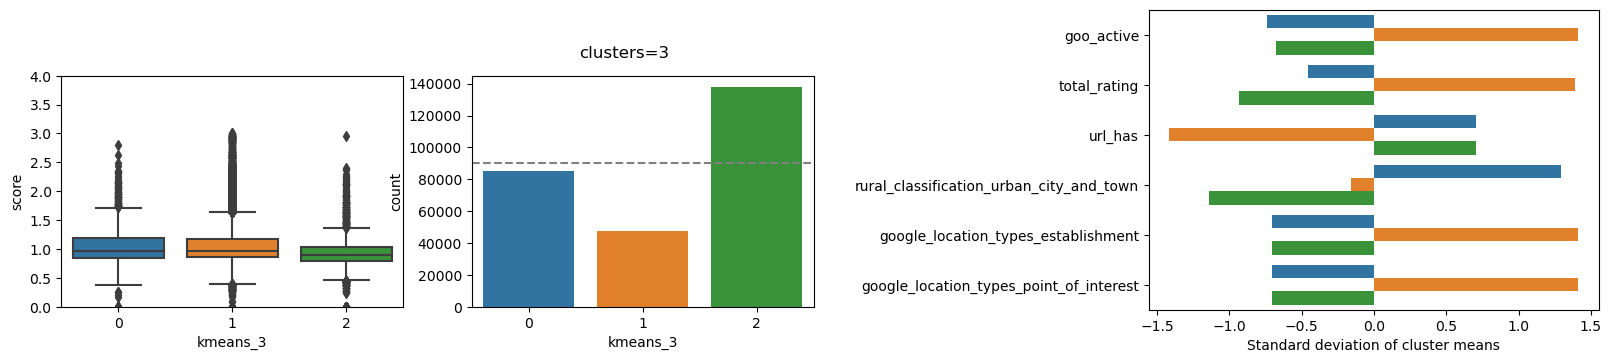

In [330]:
kmeans_plot(rests_with_scores,'kmeans_3')

def get_top_features(data_x, rests_with_scores, clusters, km):
    (
            feature_means,
            flattened_array,
            cluster_centroids,
            cluster_features,
        ) = get_feature_variance(data_x, rests_with_scores, clusters, km)
    output = get_clusters_top_features(cluster_centroids, cluster_features)
    return output

In [346]:
stu = get_top_features(data_x, rests_with_scores, clusters, km)
stu

/var/folders/qg/cymh3xj54359hfkwzmfnxxlh0000gn/T/ipykernel_68840/1058859071.py:45: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cluster_features = n_data.columns[cluster_feature_importances]


"Features with highest mean values:\n Cluster 0: ['url_has' 'goo_active' 'rural_classification_urban_city_and_town']\n Cluster 1: ['google_location_types_establishment'\n 'google_location_types_point_of_interest' 'goo_active']\n Cluster 2: ['total_rating' 'url_has' 'goo_active']"